In [1]:
import numpy as np
import SimpleITK as sitk
import collections
import random
import PIL as img
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 

In [2]:
import imgaug as ia
from imgaug import augmenters as iaa

In [61]:
#my_nii = sitk.ReadImage(r'C:\Users\User\Desktop\Mask_generator\Melissotarsus_W_head_segmentation.nii',sitk.sitkFloat32) #read nii file
#my_nii_np = sitk.GetArrayFromImage(my_nii)  # store data as array
my_nii = sitk.ReadImage('image.nii',sitk.sitkFloat32) #read nii file
my_nii_np = sitk.GetArrayFromImage(my_nii)  

In [5]:
print (my_nii_np.shape) # array dimensions

(992, 1013, 995)


In [48]:
collections.Counter(my_nii_np[:,:,500].flatten()) # check all categories (labels)

Counter({3.0: 955099, 2.0: 52836})

In [42]:
slice_0 = my_nii_np[:,:,500] # slice 500 stored in a new variable
slice_0[slice_0!=2]=0 # change all pixels to 0 (except category 10)
slice_0[slice_0!=0]=1

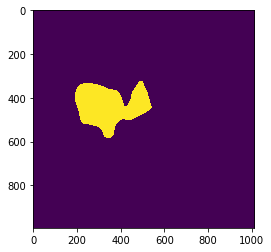

In [33]:
plt.imshow(slice_0) # plot
plt.show()

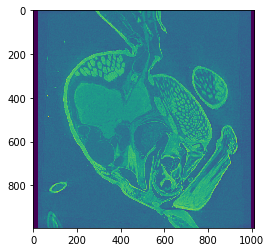

In [38]:
my_rawnii = sitk.ReadImage('image.raw.nii',sitk.sitkFloat32) #read raw nii file
my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  # store data as array

rawslice_0 = my_rawnii_np[:,:,500] # slice 500 stored in a new variable

plt.imshow(rawslice_0) # plot
plt.show()

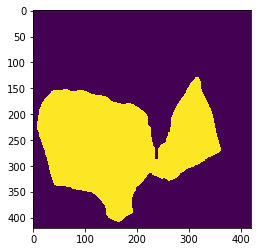

In [10]:
mask1 = slice_0[x1:y1,x2:y2]
plt.imshow(slice_0[x1:y1,x2:y2])  #extract a patch and plot.
plt.show()

In [8]:
import imageio
for i in range(1,n):
    slice_0 = my_nii_np[:,:,i]
    slice_0[slice_0!=2]=1 
    slice_0[slice_0==2]=0
    my_rawnii = sitk.ReadImage('image.nii') 
    my_rawnii_np = sitk.GetArrayFromImage(my_rawnii)  
    rawslice_0 = my_rawnii_np[:,:,i]
    
    rawoutput = []
    maskoutput = []
    for x in range(0,9):
        raw1 = rawslice_0[x1:y1,x2:y2]
        rawoutput.append(raw1)
        mask1 = slice_0[x1:y1,x2:y2]
        maskoutput.append(mask1)

    y = 0
    for x in range(0,9):
        rawimages = sitk.GetImageFromArray(rawoutput[x])
        rawimages = sitk.Cast(sitk.RescaleIntensity(rawimages),sitk.sitkUInt8)
        sitk.WriteImage( rawimages, 'A_'+ str(i)+'.tif')
        maskimages = sitk.GetImageFromArray(maskoutput[x])  
        maskimages = sitk.Cast(sitk.RescaleIntensity(maskimages),sitk.sitkUInt8)
        sitk.WriteImage(maskimages, 'A_'+ str(i)+'_mask.tif')         
        sitk.WriteImage( rawimages , 'im_'+str(i)+'.png')
        im = imageio.imread('A_'+str(i)+'.tif')
        aug = iaa.HistogramEqualization()
        image_aug = aug.augment_image(im)
        aug = iaa.Resize(520, interpolation=["linear", "cubic"])
        image_aug = aug.augment_image(im)
        image_aug = sitk.GetImageFromArray(image_aug)
        im_mask = imageio.imread('A_'+str(i)+'_mask.tif')
        image_aug_mask = aug.augment_image(im_mask)
        image_aug_mask = sitk.GetImageFromArray(image_aug_mask)
        sitk.WriteImage(image_aug_mask, 'A_'+ str(i)+'_mask.tif')
        y +=1
        